In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [61]:
import numpy as np
from Bio import SeqIO
from Bio import pairwise2

In [4]:
plus = pd.read_csv('cov8+.txt', sep='\t', names=['contig', 'start', 'end', 'cov'])
plus

,contig,start,end,cov
0,contig_4,0,15,1.0
1,contig_4,15,16,2.0
2,contig_4,16,53,3.0
3,contig_4,53,58,4.0
4,contig_4,58,60,5.0
...,...,...,...,...
870264,contig_2,21925,21970,4.0
870265,contig_2,21970,21987,3.0
870266,contig_2,21987,22020,2.0
870267,contig_2,22020,22027,1.0


In [10]:
plus['cov'].unique()

array([1.000e+00, 2.000e+00, 3.000e+00, ..., 8.611e+03, 8.622e+03,
       5.162e+03])

In [13]:
plus['start']

0             0
1            15
2            16
3            53
4            58
          ...  
870264    21925
870265    21970
870266    21987
870267    22020
870268    22604
Name: start, Length: 870269, dtype: int64

In [22]:
plus_selected = plus[(plus['start'] > 3500) & (plus['end']<6400)]

In [24]:
plus_selected = plus_selected[plus_selected['contig'] == 'contig_4']

In [25]:
plus_selected

,contig,start,end,cov
1494,contig_4,3502,3503,69.0
1495,contig_4,3503,3504,71.0
1496,contig_4,3504,3505,72.0
1497,contig_4,3505,3507,71.0
1498,contig_4,3507,3510,70.0
...,...,...,...,...
1695,contig_4,6389,6390,100.0
1696,contig_4,6390,6391,104.0
1697,contig_4,6391,6393,105.0
1698,contig_4,6393,6396,106.0


In [27]:
plus_selected['coords'] = plus_selected['start'].astype(str) + "_" + plus_selected['end'].astype(str)

/tmp/ipykernel_23570/1731978391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plus_selected['coords'] = plus_selected['start'].astype(str) + "_" + plus_selected['end'].astype(str)


In [28]:
plus_selected

,contig,start,end,cov,coords
1494,contig_4,3502,3503,69.0,3502_3503
1495,contig_4,3503,3504,71.0,3503_3504
1496,contig_4,3504,3505,72.0,3504_3505
1497,contig_4,3505,3507,71.0,3505_3507
1498,contig_4,3507,3510,70.0,3507_3510
...,...,...,...,...,...
1695,contig_4,6389,6390,100.0,6389_6390
1696,contig_4,6390,6391,104.0,6390_6391
1697,contig_4,6391,6393,105.0,6391_6393
1698,contig_4,6393,6396,106.0,6393_6396


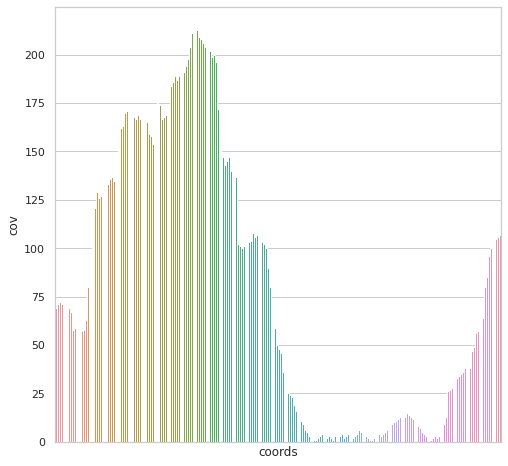

In [47]:
with sns.plotting_context(context="notebook"):
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(8,8))
    ax = sns.barplot(data=plus_selected, x='coords', y='cov')
    plt.xticks([], [])
    plt.show()

In [12]:
plus[plus['start'] == 3932]

,contig,start,end,cov


In [ ]:
3932 - 6371

In [34]:
minus = pd.read_csv('cov8-.txt', sep='\t', names=['contig', 'start', 'end', 'cov'])

In [35]:
minus_selected = minus[(minus['start'] > 3500) & (minus['end']<6400)]

In [36]:
minus_selected = minus_selected[minus_selected['contig'] == 'contig_4']
minus_selected['coords'] = minus_selected['start'].astype(str) + "_" + minus_selected['end'].astype(str)

In [38]:
minus_selected['cov_2'] = minus_selected['cov']*-1

In [42]:
minus_selected['cov_2']

39      -1.0
40      -2.0
41      -4.0
42      -5.0
43     -10.0
        ... 
1491    -7.0
1492    -6.0
1493    -4.0
1494    -2.0
1495    -1.0
Name: cov_2, Length: 1457, dtype: float64

In [56]:
len(minus_selected.coords.unique())

1457

<AxesSubplot:>

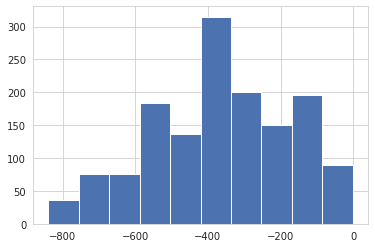

In [58]:
minus_selected['cov_2'].hist()

<AxesSubplot:>

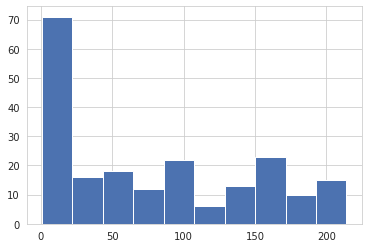

In [61]:
plus_selected['cov'].hist()

In [60]:
plus_selected

,contig,start,end,cov,coords
1494,contig_4,3502,3503,69.0,3502_3503
1495,contig_4,3503,3504,71.0,3503_3504
1496,contig_4,3504,3505,72.0,3504_3505
1497,contig_4,3505,3507,71.0,3505_3507
1498,contig_4,3507,3510,70.0,3507_3510
...,...,...,...,...,...
1695,contig_4,6389,6390,100.0,6389_6390
1696,contig_4,6390,6391,104.0,6390_6391
1697,contig_4,6391,6393,105.0,6391_6393
1698,contig_4,6393,6396,106.0,6393_6396


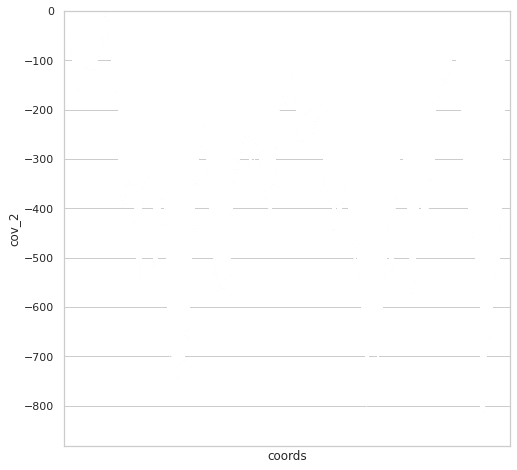

In [51]:
with sns.plotting_context(context="notebook"):
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(8,8))
    ax = sns.barplot(data=minus_selected, x='coords', y='cov_2')
    plt.xticks([], [])
    plt.show()

In [3]:
data = pd.read_csv('metatranscriptomics/b_uni_genome.gff', comment='#', sep='\t', names=['ref', 'prodigal', 'CDS', 'start', 'end', 'row', 'strand', 'row2', 'annot'], engine='python')
data

,ref,prodigal,CDS,start,end,row,strand,row2,annot
0,contig_4,INFERNAL:1.1.2,ncRNA,1642844,1645710,.,+,.,ID=contig_4_ncRNA1;inference=Rfam:14.6;locus_t...
1,contig_4,INFERNAL:1.1.2,ncRNA,3830278,3833144,.,-,.,ID=contig_4_ncRNA2;inference=Rfam:14.6;locus_t...
2,contig_4,INFERNAL:1.1.2,ncRNA,490503,493369,.,+,.,ID=contig_4_ncRNA3;inference=Rfam:14.6;locus_t...
3,contig_4,INFERNAL:1.1.2,ncRNA,3136801,3139667,.,-,.,ID=contig_4_ncRNA4;inference=Rfam:14.6;locus_t...
4,contig_4,INFERNAL:1.1.2,ncRNA,1640830,1642352,.,+,.,ID=contig_4_ncRNA5;inference=Rfam:14.6;locus_t...
...,...,...,...,...,...,...,...,...,...
3877,contig_4,Prodigal:002006,CDS,4678480,4681635,.,+,0,ID=bc2018--bc2018___80_03908;Name=mdtB_2;gene=...
3878,contig_4,Prodigal:002006,CDS,4681632,4683050,.,+,0,ID=bc2018--bc2018___80_03909;inference=ab init...
3879,contig_4,Prodigal:002006,CDS,4683091,4684353,.,+,0,ID=bc2018--bc2018___80_03910;inference=ab init...
3880,contig_4,Prodigal:002006,CDS,4684812,4687811,.,-,0,ID=bc2018--bc2018___80_03911;Name=secD;gene=se...


In [4]:
data = data[data.CDS == 'CDS']
data = data[['strand','annot']]
data

,strand,annot
46,+,ID=bc2018--bc2018___80_00014;inference=ab init...
47,-,ID=bc2018--bc2018___80_00015;inference=ab init...
48,-,ID=bc2018--bc2018___80_00016;inference=ab init...
49,-,ID=bc2018--bc2018___80_00017;inference=ab init...
50,+,ID=bc2018--bc2018___80_00018;Name=hup_1;gene=h...
...,...,...
3877,+,ID=bc2018--bc2018___80_03908;Name=mdtB_2;gene=...
3878,+,ID=bc2018--bc2018___80_03909;inference=ab init...
3879,+,ID=bc2018--bc2018___80_03910;inference=ab init...
3880,-,ID=bc2018--bc2018___80_03911;Name=secD;gene=se...


In [5]:
data['index'] = data['annot'].str.split(';', expand=True)[0]
data

,strand,annot,index
46,+,ID=bc2018--bc2018___80_00014;inference=ab init...,ID=bc2018--bc2018___80_00014
47,-,ID=bc2018--bc2018___80_00015;inference=ab init...,ID=bc2018--bc2018___80_00015
48,-,ID=bc2018--bc2018___80_00016;inference=ab init...,ID=bc2018--bc2018___80_00016
49,-,ID=bc2018--bc2018___80_00017;inference=ab init...,ID=bc2018--bc2018___80_00017
50,+,ID=bc2018--bc2018___80_00018;Name=hup_1;gene=h...,ID=bc2018--bc2018___80_00018
...,...,...,...
3877,+,ID=bc2018--bc2018___80_03908;Name=mdtB_2;gene=...,ID=bc2018--bc2018___80_03908
3878,+,ID=bc2018--bc2018___80_03909;inference=ab init...,ID=bc2018--bc2018___80_03909
3879,+,ID=bc2018--bc2018___80_03910;inference=ab init...,ID=bc2018--bc2018___80_03910
3880,-,ID=bc2018--bc2018___80_03911;Name=secD;gene=se...,ID=bc2018--bc2018___80_03911


In [6]:
data['index'] = data['index'].str.strip('ID=')
data

,strand,annot,index
46,+,ID=bc2018--bc2018___80_00014;inference=ab init...,bc2018--bc2018___80_00014
47,-,ID=bc2018--bc2018___80_00015;inference=ab init...,bc2018--bc2018___80_00015
48,-,ID=bc2018--bc2018___80_00016;inference=ab init...,bc2018--bc2018___80_00016
49,-,ID=bc2018--bc2018___80_00017;inference=ab init...,bc2018--bc2018___80_00017
50,+,ID=bc2018--bc2018___80_00018;Name=hup_1;gene=h...,bc2018--bc2018___80_00018
...,...,...,...
3877,+,ID=bc2018--bc2018___80_03908;Name=mdtB_2;gene=...,bc2018--bc2018___80_03908
3878,+,ID=bc2018--bc2018___80_03909;inference=ab init...,bc2018--bc2018___80_03909
3879,+,ID=bc2018--bc2018___80_03910;inference=ab init...,bc2018--bc2018___80_03910
3880,-,ID=bc2018--bc2018___80_03911;Name=secD;gene=se...,bc2018--bc2018___80_03911


In [7]:
an = pd.read_csv('index_matching.csv')
an

,index,bacuni,Entry.Name,Gene
0,bc2018--bc2018___80_00001,bc2018--bc2018___80_00001,NaN,bc2018--bc2018___80_00001
1,bc2018--bc2018___80_00002,BACUNI_00026,A7UXK8_BACUC,BACUNI_00026
2,bc2018--bc2018___80_00003,BACUNI_00025,NaN,BACUNI_00025
3,bc2018--bc2018___80_00004,BACUNI_00020,NaN,BACUNI_00020
4,bc2018--bc2018___80_00005,BACUNI_00054,A7UXN6_BACUC,BACUNI_00054
...,...,...,...,...
3890,bc2018--bc2018___80_03908,BACUNI_04008,NaN,BACUNI_04008
3891,bc2018--bc2018___80_03909,BACUNI_04007,NaN,BACUNI_04007
3892,bc2018--bc2018___80_03910,BACUNI_04006,NaN,BACUNI_04006
3893,bc2018--bc2018___80_03911,BACUNI_04003,A7V8T3_BACUC,secD


In [8]:
ebi = pd.merge(an[['index', 'bacuni']], data[['index', 'strand']], on='index')[['bacuni', 'strand']]
ebi

,bacuni,strand
0,bc2018--bc2018___80_00014,+
1,BACUNI_04001,-
2,BACUNI_04000,-
3,BACUNI_03999,-
4,BACUNI_03997,+
...,...,...
3831,BACUNI_04008,+
3832,BACUNI_04007,+
3833,BACUNI_04006,+
3834,BACUNI_04003,-


In [126]:
data = pd.read_csv('/home/nastya/Downloads/GCF_000154205.1_ASM15420v1_genomic.gff', comment='#', sep='\t', names=['ref', 'prodigal', 'CDS', 'start', 'end', 'row', 'strand', 'row2', 'annot'], engine='python')
data

,ref,prodigal,CDS,start,end,row,strand,row2,annot
0,NZ_DS362249.1,RefSeq,region,1,513255,.,+,.,"ID=NZ_DS362249.1:1..513255;Dbxref=ATCC:8492,ta..."
1,NZ_DS362249.1,RefSeq,gene,75,1601,.,-,.,ID=gene-BACUNI_RS17005;Name=BACUNI_RS17005;gbk...
2,NZ_DS362249.1,cmsearch,rRNA,75,1601,.,-,.,ID=rna-BACUNI_RS17005;Parent=gene-BACUNI_RS170...
3,NZ_DS362249.1,cmsearch,exon,75,1601,.,-,.,ID=exon-BACUNI_RS17005-1;Parent=rna-BACUNI_RS1...
4,NZ_DS362249.1,RefSeq,gene,2354,2827,.,-,.,ID=gene-BACUNI_RS17015;Name=BACUNI_RS17015;gbk...
...,...,...,...,...,...,...,...,...,...
7841,NZ_DS362217.1,Protein Homology,CDS,645,879,.,+,0,ID=cds-BACUNI_RS19250;Parent=gene-BACUNI_RS192...
7842,NZ_DS362217.1,RefSeq,gene,1908,2168,.,+,.,ID=gene-BACUNI_RS00015;Name=BACUNI_RS00015;gbk...
7843,NZ_DS362217.1,Protein Homology,CDS,1908,2168,.,+,0,ID=cds-WP_005823526.1-2;Parent=gene-BACUNI_RS0...
7844,NZ_DS362217.1,RefSeq,pseudogene,2155,2374,.,+,.,ID=gene-BACUNI_RS19260;Name=BACUNI_RS19260;end...


In [127]:
data = data[data.CDS == 'gene']
data = data[['strand','annot']]
data

,strand,annot
1,-,ID=gene-BACUNI_RS17005;Name=BACUNI_RS17005;gbk...
4,-,ID=gene-BACUNI_RS17015;Name=BACUNI_RS17015;gbk...
6,-,ID=gene-BACUNI_RS20280;Name=BACUNI_RS20280;gbk...
8,-,ID=gene-BACUNI_RS17020;Name=BACUNI_RS17020;gbk...
10,-,ID=gene-BACUNI_RS17025;Name=dnaB;gbkey=Gene;ge...
...,...,...
7824,+,ID=gene-BACUNI_RS00045;Name=BACUNI_RS00045;gbk...
7826,+,ID=gene-BACUNI_RS00050;Name=BACUNI_RS00050;end...
7829,-,ID=gene-BACUNI_RS00020;Name=BACUNI_RS00020;gbk...
7833,+,ID=gene-BACUNI_RS00030;Name=BACUNI_RS00030;gbk...


In [128]:
data['index'] = data['annot'].str.split(';', expand=True)[0]
data

,strand,annot,index
1,-,ID=gene-BACUNI_RS17005;Name=BACUNI_RS17005;gbk...,ID=gene-BACUNI_RS17005
4,-,ID=gene-BACUNI_RS17015;Name=BACUNI_RS17015;gbk...,ID=gene-BACUNI_RS17015
6,-,ID=gene-BACUNI_RS20280;Name=BACUNI_RS20280;gbk...,ID=gene-BACUNI_RS20280
8,-,ID=gene-BACUNI_RS17020;Name=BACUNI_RS17020;gbk...,ID=gene-BACUNI_RS17020
10,-,ID=gene-BACUNI_RS17025;Name=dnaB;gbkey=Gene;ge...,ID=gene-BACUNI_RS17025
...,...,...,...
7824,+,ID=gene-BACUNI_RS00045;Name=BACUNI_RS00045;gbk...,ID=gene-BACUNI_RS00045
7826,+,ID=gene-BACUNI_RS00050;Name=BACUNI_RS00050;end...,ID=gene-BACUNI_RS00050
7829,-,ID=gene-BACUNI_RS00020;Name=BACUNI_RS00020;gbk...,ID=gene-BACUNI_RS00020
7833,+,ID=gene-BACUNI_RS00030;Name=BACUNI_RS00030;gbk...,ID=gene-BACUNI_RS00030


In [129]:
data['index'] = data['index'].str.strip('ID=')
data

,strand,annot,index
1,-,ID=gene-BACUNI_RS17005;Name=BACUNI_RS17005;gbk...,gene-BACUNI_RS17005
4,-,ID=gene-BACUNI_RS17015;Name=BACUNI_RS17015;gbk...,gene-BACUNI_RS17015
6,-,ID=gene-BACUNI_RS20280;Name=BACUNI_RS20280;gbk...,gene-BACUNI_RS20280
8,-,ID=gene-BACUNI_RS17020;Name=BACUNI_RS17020;gbk...,gene-BACUNI_RS17020
10,-,ID=gene-BACUNI_RS17025;Name=dnaB;gbkey=Gene;ge...,gene-BACUNI_RS17025
...,...,...,...
7824,+,ID=gene-BACUNI_RS00045;Name=BACUNI_RS00045;gbk...,gene-BACUNI_RS00045
7826,+,ID=gene-BACUNI_RS00050;Name=BACUNI_RS00050;end...,gene-BACUNI_RS00050
7829,-,ID=gene-BACUNI_RS00020;Name=BACUNI_RS00020;gbk...,gene-BACUNI_RS00020
7833,+,ID=gene-BACUNI_RS00030;Name=BACUNI_RS00030;gbk...,gene-BACUNI_RS00030


In [130]:
transc_dict = {}
for _,row in data.iterrows():
    text=row.annot
    ID = re.compile(r'ID=([.A-Za-z0-9_-]+)') 
    name = re.compile(r'old_locus_tag=([,:A-Za-z0-9_-]+)') 
    findid = ID.findall(text.strip())[0]
    try:
        findname = name.findall(text.strip())[0]
    except:
        findname = np.nan
        
    transc_dict.update({findid:findname})
    
transc_dict

{'gene-BACUNI_RS17005': nan,
 'gene-BACUNI_RS17015': 'BACUNI_04223',
 'gene-BACUNI_RS20280': nan,
 'gene-BACUNI_RS17020': nan,
 'gene-BACUNI_RS17025': 'BACUNI_04227',
 'gene-BACUNI_RS17030': 'BACUNI_04228',
 'gene-BACUNI_RS17035': 'BACUNI_04229',
 'gene-BACUNI_RS17045': 'BACUNI_04232',
 'gene-BACUNI_RS17050': 'BACUNI_04234',
 'gene-BACUNI_RS17055': nan,
 'gene-BACUNI_RS17060': 'BACUNI_04237',
 'gene-BACUNI_RS17065': 'BACUNI_04238',
 'gene-BACUNI_RS17070': 'BACUNI_04239',
 'gene-BACUNI_RS17075': 'BACUNI_04240',
 'gene-BACUNI_RS17080': 'BACUNI_04241',
 'gene-BACUNI_RS17085': nan,
 'gene-BACUNI_RS17090': 'BACUNI_04245',
 'gene-BACUNI_RS17095': 'BACUNI_04246',
 'gene-BACUNI_RS17100': 'BACUNI_04248',
 'gene-BACUNI_RS17105': 'BACUNI_04249',
 'gene-BACUNI_RS17110': 'BACUNI_04250',
 'gene-BACUNI_RS17115': 'BACUNI_04251',
 'gene-BACUNI_RS17120': 'BACUNI_04252',
 'gene-BACUNI_RS17125': 'BACUNI_04253',
 'gene-BACUNI_RS17130': 'BACUNI_04254',
 'gene-BACUNI_RS17135': 'BACUNI_04255',
 'gene-BACUNI_R

In [131]:
id_name = pd.DataFrame.from_dict(transc_dict, orient='index', columns=['bacuni'])
id_name = id_name.reset_index()
id_name

,index,bacuni
0,gene-BACUNI_RS17005,NaN
1,gene-BACUNI_RS17015,BACUNI_04223
2,gene-BACUNI_RS20280,NaN
3,gene-BACUNI_RS17020,NaN
4,gene-BACUNI_RS17025,BACUNI_04227
...,...,...
3772,gene-BACUNI_RS00045,NaN
3773,gene-BACUNI_RS00050,BACUNI_00024
3774,gene-BACUNI_RS00020,NaN
3775,gene-BACUNI_RS00030,BACUNI_00043


In [132]:
id_name['index'] = id_name['index'].str.replace('gene-', '')

In [16]:
data['index'] = data['index'].str.replace('gene-', '')

In [17]:
ncbi = pd.merge(id_name[['index', 'bacuni']], data[['index', 'strand']], on='index')[['bacuni', 'strand']]
ncbi

,bacuni,strand
0,NaN,-
1,BACUNI_04223,-
2,NaN,-
3,NaN,-
4,BACUNI_04227,-
...,...,...
3772,NaN,+
3773,BACUNI_00024,+
3774,NaN,-
3775,BACUNI_00043,+


In [18]:
ncbi = ncbi.rename(columns={'strand':'strand_ncbi'})
ncbi

,bacuni,strand_ncbi
0,NaN,-
1,BACUNI_04223,-
2,NaN,-
3,NaN,-
4,BACUNI_04227,-
...,...,...
3772,NaN,+
3773,BACUNI_00024,+
3774,NaN,-
3775,BACUNI_00043,+


In [89]:
bacuni_list = pd.merge(ebi, ncbi, on='bacuni')
bacuni_list

,index_x,bacuni,ref_x,start_x,end_x,index_y,ref_y,start_y,end_y
0,bc2018--bc2018___80_00015,BACUNI_04001,contig_4,1038,2138,BACUNI_RS16145,NZ_DS362248.1,256956,258056
1,bc2018--bc2018___80_00016,BACUNI_04000,contig_4,2231,3121,BACUNI_RS16140,NZ_DS362248.1,255973,256863
2,bc2018--bc2018___80_00017,BACUNI_03999,contig_4,3102,3785,BACUNI_RS16135,NZ_DS362248.1,255309,255992
3,bc2018--bc2018___80_00018,BACUNI_03997,contig_4,4032,4298,BACUNI_RS16130,NZ_DS362248.1,254796,255062
4,bc2018--bc2018___80_00019,BACUNI_03996,contig_4,4454,6271,BACUNI_RS16125,NZ_DS362248.1,252823,254640
...,...,...,...,...,...,...,...,...,...
3276,bc2018--bc2018___80_03908,BACUNI_04008,contig_4,4678480,4681635,BACUNI_RS16170,NZ_DS362248.1,266436,269591
3277,bc2018--bc2018___80_03909,BACUNI_04007,contig_4,4681632,4683050,BACUNI_RS16165,NZ_DS362248.1,265021,266439
3278,bc2018--bc2018___80_03910,BACUNI_04006,contig_4,4683091,4684353,BACUNI_RS16160,NZ_DS362248.1,263718,264980
3279,bc2018--bc2018___80_03911,BACUNI_04003,contig_4,4684812,4687811,BACUNI_RS16155,NZ_DS362248.1,260260,263259


In [20]:
a[a.strand == a.strand_ncbi]

,bacuni,strand,strand_ncbi
62,BACUNI_02401,-,-
64,BACUNI_02401,-,-
65,BACUNI_02401,-,-
68,BACUNI_03048,+,+
147,BACUNI_03811,+,+
...,...,...,...
3151,BACUNI_00533,+,+
3152,BACUNI_00536,+,+
3153,BACUNI_00537,+,+
3154,BACUNI_00538,+,+


In [ ]:
# make alignments

In [27]:
fasta_ebi = 'metatranscriptomics/b_uni_type_4only.fa'
fasta_ncbi = '/home/nastya/Downloads/GCF_000154205.1_ASM15420v1_genomic.fna'

In [37]:
def fragment_extract(fasta, contig, start, end):
    with open(fasta) as handle:
        for record in SeqIO.parse(handle, "fasta"):
            if record.id == contig:
                data = record.seq
    gen_slice = data[start-1:end]
    return gen_slice

In [39]:
data = pd.read_csv('metatranscriptomics/b_uni_genome.gff', comment='#', sep='\t', names=['ref', 'prodigal', 'CDS', 'start', 'end', 'row', 'strand', 'row2', 'annot'], engine='python')
data = data[data.CDS == 'CDS']
data = data[['ref','start', 'end','annot']]
data['index'] = data['annot'].str.split(';', expand=True)[0]
data['index'] = data['index'].str.strip('ID=')
an = pd.read_csv('index_matching.csv')
ebi = pd.merge(an[['index', 'bacuni']], data[['index', 'ref','start', 'end']], on='index')
ebi

,index,bacuni,ref,start,end
0,bc2018--bc2018___80_00014,bc2018--bc2018___80_00014,contig_4,277,978
1,bc2018--bc2018___80_00015,BACUNI_04001,contig_4,1038,2138
2,bc2018--bc2018___80_00016,BACUNI_04000,contig_4,2231,3121
3,bc2018--bc2018___80_00017,BACUNI_03999,contig_4,3102,3785
4,bc2018--bc2018___80_00018,BACUNI_03997,contig_4,4032,4298
...,...,...,...,...,...
3831,bc2018--bc2018___80_03908,BACUNI_04008,contig_4,4678480,4681635
3832,bc2018--bc2018___80_03909,BACUNI_04007,contig_4,4681632,4683050
3833,bc2018--bc2018___80_03910,BACUNI_04006,contig_4,4683091,4684353
3834,bc2018--bc2018___80_03911,BACUNI_04003,contig_4,4684812,4687811


In [56]:
data = pd.read_csv('/home/nastya/Downloads/GCF_000154205.1_ASM15420v1_genomic.gff', comment='#', sep='\t', names=['ref', 'prodigal', 'CDS', 'start', 'end', 'row', 'strand', 'row2', 'annot'], engine='python')
data = data[data.CDS == 'gene']
data = data[['ref','start', 'end','annot']]
data['index'] = data['annot'].str.split(';', expand=True)[0]
data['index'] = data['index'].str.strip('ID=')

In [58]:
data['index'] = data['index'].str.replace('gene-', '')

In [59]:
data

,ref,start,end,annot,index
1,NZ_DS362249.1,75,1601,ID=gene-BACUNI_RS17005;Name=BACUNI_RS17005;gbk...,BACUNI_RS17005
4,NZ_DS362249.1,2354,2827,ID=gene-BACUNI_RS17015;Name=BACUNI_RS17015;gbk...,BACUNI_RS17015
6,NZ_DS362249.1,2874,2975,ID=gene-BACUNI_RS20280;Name=BACUNI_RS20280;gbk...,BACUNI_RS20280
8,NZ_DS362249.1,3160,3672,ID=gene-BACUNI_RS17020;Name=BACUNI_RS17020;gbk...,BACUNI_RS17020
10,NZ_DS362249.1,3926,5305,ID=gene-BACUNI_RS17025;Name=dnaB;gbkey=Gene;ge...,BACUNI_RS17025
...,...,...,...,...,...
7824,NZ_DS362219.1,955,1369,ID=gene-BACUNI_RS00045;Name=BACUNI_RS00045;gbk...,BACUNI_RS00045
7826,NZ_DS362219.1,2310,2546,ID=gene-BACUNI_RS00050;Name=BACUNI_RS00050;end...,BACUNI_RS00050
7829,NZ_DS362218.1,1,442,ID=gene-BACUNI_RS00020;Name=BACUNI_RS00020;gbk...,BACUNI_RS00020
7833,NZ_DS362218.1,2519,5368,ID=gene-BACUNI_RS00030;Name=BACUNI_RS00030;gbk...,BACUNI_RS00030


In [60]:
ncbi = pd.merge(id_name[['index', 'bacuni']], data[['index', 'ref','start', 'end']], on='index')
ncbi

,index,bacuni,ref,start,end
0,BACUNI_RS17005,NaN,NZ_DS362249.1,75,1601
1,BACUNI_RS17015,BACUNI_04223,NZ_DS362249.1,2354,2827
2,BACUNI_RS20280,NaN,NZ_DS362249.1,2874,2975
3,BACUNI_RS17020,NaN,NZ_DS362249.1,3160,3672
4,BACUNI_RS17025,BACUNI_04227,NZ_DS362249.1,3926,5305
...,...,...,...,...,...
3772,BACUNI_RS00045,NaN,NZ_DS362219.1,955,1369
3773,BACUNI_RS00050,BACUNI_00024,NZ_DS362219.1,2310,2546
3774,BACUNI_RS00020,NaN,NZ_DS362218.1,1,442
3775,BACUNI_RS00030,BACUNI_00043,NZ_DS362218.1,2519,5368


In [75]:
ncbi.duplicated(subset='bacuni').sum()

88

In [76]:
a.duplicated(subset='bacuni').sum()

27

In [77]:
a = a.drop_duplicates(subset='bacuni', keep='first')
ebi = ebi.drop_duplicates(subset='bacuni', keep='first')
ncbi = ncbi.drop_duplicates(subset='bacuni', keep='first')

In [94]:
reverse_count = 0
right_count = 0
for bacuni_id in bacuni_list.bacuni.to_list():
    row_1 = ebi[ebi.bacuni == bacuni_id]
    row_2 = ncbi[ncbi.bacuni == bacuni_id]
    a = fragment_extract(fasta_ebi,row_1.ref.item(), row_1.start.item(), row_1.end.item())
    b = fragment_extract(fasta_ncbi,row_2.ref.item(), row_2.start.item(), row_2.end.item())
    ar = a.reverse_complement()
    alignments = pairwise2.align.globalxx(ar,b)
    if alignments[0].score >= 0.9*len(a):
        reverse_count += 1
        print(bacuni_id, 'reversed')
    else:
        alignments = pairwise2.align.globalxx(a,b)
        if alignments[0].score >= 0.9*len(a):
            right_count += 1
            print(bacuni_id, 'right')

BACUNI_04001 reversed
BACUNI_04000 reversed
BACUNI_03999 reversed
BACUNI_03997 reversed
BACUNI_03996 reversed
BACUNI_03994 reversed
BACUNI_03993 reversed
BACUNI_03992 reversed
BACUNI_03991 reversed
BACUNI_03990 reversed
BACUNI_03989 reversed
BACUNI_03988 reversed
BACUNI_03987 reversed
BACUNI_03985 reversed
BACUNI_03984 reversed
BACUNI_03982 reversed
BACUNI_03981 reversed
BACUNI_03980 reversed
BACUNI_03978 reversed
BACUNI_03977 reversed
BACUNI_03976 reversed
BACUNI_03974 reversed
BACUNI_03973 reversed
BACUNI_03971 reversed
BACUNI_03970 reversed
BACUNI_03969 reversed
BACUNI_03968 reversed
BACUNI_03967 reversed
BACUNI_03966 reversed
BACUNI_03965 reversed
BACUNI_03964 reversed
BACUNI_03963 reversed
BACUNI_03962 reversed
BACUNI_03961 reversed
BACUNI_03960 reversed
BACUNI_03959 reversed
BACUNI_03957 reversed
BACUNI_03956 reversed
BACUNI_03954 reversed
BACUNI_03953 reversed
BACUNI_03952 reversed
BACUNI_03951 reversed
BACUNI_03950 reversed
BACUNI_03949 reversed
BACUNI_03948 reversed
BACUNI_039

BACUNI_03084 right
BACUNI_03086 right
BACUNI_03087 right
BACUNI_03089 right
BACUNI_03090 right
BACUNI_03091 right
BACUNI_03092 right
BACUNI_03093 right
BACUNI_03094 right
BACUNI_03095 right
BACUNI_03096 right
BACUNI_03098 right
BACUNI_03099 right
BACUNI_03100 right
BACUNI_03101 right
BACUNI_03104 right
BACUNI_03105 right
BACUNI_03106 right
BACUNI_03107 right
BACUNI_03108 right
BACUNI_03111 right
BACUNI_03112 right
BACUNI_03113 right
BACUNI_03114 right
BACUNI_03115 right
BACUNI_03116 right
BACUNI_03118 right
BACUNI_03119 right
BACUNI_03120 right
BACUNI_03121 right
BACUNI_03124 right
BACUNI_03125 right
BACUNI_03126 right
BACUNI_03127 right
BACUNI_03129 right
BACUNI_03131 right
BACUNI_03132 right
BACUNI_03133 right
BACUNI_03135 right
BACUNI_03136 right
BACUNI_03137 right
BACUNI_03138 right
BACUNI_03139 right
BACUNI_03140 right
BACUNI_03141 right
BACUNI_03142 right
BACUNI_03143 right
BACUNI_03144 right
BACUNI_03145 right
BACUNI_03146 right
BACUNI_03147 right
BACUNI_03148 right
BACUNI_03149

BACUNI_04719 reversed
BACUNI_04718 reversed
BACUNI_04717 reversed
BACUNI_04716 reversed
BACUNI_04715 reversed
BACUNI_04714 reversed
BACUNI_04713 reversed
BACUNI_04712 reversed
BACUNI_04711 reversed
BACUNI_04710 reversed
BACUNI_04709 reversed
BACUNI_04708 reversed
BACUNI_04706 reversed
BACUNI_04705 reversed
BACUNI_04704 reversed
BACUNI_04703 reversed
BACUNI_04702 reversed
BACUNI_04700 reversed
BACUNI_04699 reversed
BACUNI_04698 reversed
BACUNI_04697 reversed
BACUNI_04696 reversed
BACUNI_04693 reversed
BACUNI_04692 reversed
BACUNI_04691 reversed
BACUNI_04689 reversed
BACUNI_04688 reversed
BACUNI_04687 reversed
BACUNI_04686 reversed
BACUNI_04685 reversed
BACUNI_04684 reversed
BACUNI_04683 reversed
BACUNI_04682 reversed
BACUNI_04681 reversed
BACUNI_04680 reversed
BACUNI_04679 reversed
BACUNI_04678 reversed
BACUNI_04677 reversed
BACUNI_04675 reversed
BACUNI_04674 reversed
BACUNI_04673 reversed
BACUNI_04672 reversed
BACUNI_04671 reversed
BACUNI_04667 reversed
BACUNI_04666 reversed
BACUNI_046

BACUNI_01806 right
BACUNI_01808 right
BACUNI_01809 right
BACUNI_01810 right
BACUNI_01811 right
BACUNI_01812 right
BACUNI_01813 right
BACUNI_01814 right
BACUNI_01815 right
BACUNI_01816 right
BACUNI_01817 right
BACUNI_01818 right
BACUNI_01819 right
BACUNI_01820 right
BACUNI_01822 right
BACUNI_01823 right
BACUNI_01824 right
BACUNI_01825 right
BACUNI_01826 right
BACUNI_01828 right
BACUNI_01829 right
BACUNI_01830 right
BACUNI_01831 right
BACUNI_01832 right
BACUNI_01833 right
BACUNI_01834 right
BACUNI_01836 right
BACUNI_01837 right
BACUNI_01838 right
BACUNI_01839 right
BACUNI_01840 right
BACUNI_01842 right
BACUNI_01845 right
BACUNI_01847 right
BACUNI_01849 right
BACUNI_01854 right
BACUNI_01855 right
BACUNI_01856 right
BACUNI_01857 right
BACUNI_01858 right
BACUNI_01859 right
BACUNI_01860 right
BACUNI_01861 right
BACUNI_01862 right
BACUNI_01863 right
BACUNI_01864 right
BACUNI_01865 right
BACUNI_01867 right
BACUNI_01868 right
BACUNI_01869 right
BACUNI_01876 right
BACUNI_01878 right
BACUNI_01879

BACUNI_02917 right
BACUNI_02918 right
BACUNI_02919 right
BACUNI_02920 right
BACUNI_02921 right
BACUNI_02922 right
BACUNI_02923 right
BACUNI_02924 right
BACUNI_02926 right
BACUNI_02929 right
BACUNI_02930 right
BACUNI_02931 right
BACUNI_02933 right
BACUNI_02934 right
BACUNI_02935 right
BACUNI_02936 right
BACUNI_02938 right
BACUNI_02939 right
BACUNI_02942 right
BACUNI_02943 right
BACUNI_02944 right
BACUNI_02945 right
BACUNI_02946 right
BACUNI_02947 right
BACUNI_02949 right
BACUNI_02950 right
BACUNI_02951 right
BACUNI_02952 right
BACUNI_02953 right
BACUNI_02954 right
BACUNI_02955 right
BACUNI_02957 right
BACUNI_02961 right
BACUNI_02963 right
BACUNI_02966 right
BACUNI_02967 right
BACUNI_02968 right
BACUNI_02969 right
BACUNI_02971 right
BACUNI_02974 right
BACUNI_02975 right
BACUNI_02976 right
BACUNI_02977 right
BACUNI_02981 right
BACUNI_02982 right
BACUNI_02984 right
BACUNI_02985 right
BACUNI_02986 right
BACUNI_02987 right
BACUNI_02988 right
BACUNI_00547 right
BACUNI_00551 right
BACUNI_00552

BACUNI_01397 right
BACUNI_01398 right
BACUNI_01399 right
BACUNI_01400 right
BACUNI_01401 right
BACUNI_01404 right
BACUNI_01406 right
BACUNI_01407 right
BACUNI_01408 right
BACUNI_01409 right
BACUNI_01410 right
BACUNI_01411 right
BACUNI_01412 right
BACUNI_01414 right
BACUNI_01415 right
BACUNI_01416 right
BACUNI_01417 right
BACUNI_01418 right
BACUNI_01419 right
BACUNI_01420 right
BACUNI_01422 right
BACUNI_01421 right
BACUNI_01423 right
BACUNI_01424 right
BACUNI_01425 right
BACUNI_01426 right
BACUNI_01428 right
BACUNI_01430 right
BACUNI_01431 right
BACUNI_01433 right
BACUNI_01434 right
BACUNI_01435 right
BACUNI_01438 right
BACUNI_01439 right
BACUNI_01440 right
BACUNI_01441 right
BACUNI_01442 right
BACUNI_01443 right
BACUNI_01444 right
BACUNI_01445 right
BACUNI_01446 right
BACUNI_01447 right
BACUNI_01448 right
BACUNI_01450 right
BACUNI_01451 right
BACUNI_01452 right
BACUNI_01455 right
BACUNI_01456 right
BACUNI_01457 right
BACUNI_01459 right
BACUNI_01460 right
BACUNI_01461 right
BACUNI_01462

BACUNI_03506 right
BACUNI_03507 right
BACUNI_03508 right
BACUNI_03509 right
BACUNI_03510 right
BACUNI_03511 right
BACUNI_03512 right
BACUNI_03513 right
BACUNI_03514 right
BACUNI_03517 right
BACUNI_03518 right
BACUNI_03519 right
BACUNI_03520 right
BACUNI_03521 right
BACUNI_03522 right
BACUNI_03523 right
BACUNI_03524 right
BACUNI_03525 right
BACUNI_03526 right
BACUNI_03527 right
BACUNI_03528 right
BACUNI_03529 right
BACUNI_03531 right
BACUNI_03532 right
BACUNI_03533 right
BACUNI_03534 right
BACUNI_03535 right
BACUNI_03537 right
BACUNI_03539 right
BACUNI_03541 right
BACUNI_03544 right
BACUNI_03545 right
BACUNI_03546 right
BACUNI_03547 right
BACUNI_03548 right
BACUNI_03550 right
BACUNI_03551 right
BACUNI_03552 right
BACUNI_03554 right
BACUNI_03555 right
BACUNI_03556 right
BACUNI_03557 right
BACUNI_03561 right
BACUNI_03562 right
BACUNI_03563 right
BACUNI_03564 right
BACUNI_03565 right
BACUNI_03566 right
BACUNI_03567 right
BACUNI_03568 right
BACUNI_03569 right
BACUNI_03570 right
BACUNI_03571

BACUNI_00305 reversed
BACUNI_00303 reversed
BACUNI_00302 reversed
BACUNI_00301 reversed
BACUNI_00300 reversed
BACUNI_00299 reversed
BACUNI_00298 reversed
BACUNI_00296 reversed
BACUNI_00294 reversed
BACUNI_00293 reversed
BACUNI_00291 reversed
BACUNI_00289 reversed
BACUNI_00287 reversed
BACUNI_00286 reversed
BACUNI_00285 reversed
BACUNI_00284 reversed
BACUNI_00282 reversed
BACUNI_00280 reversed
BACUNI_00279 reversed
BACUNI_00278 reversed
BACUNI_00277 reversed
BACUNI_00276 reversed
BACUNI_00275 reversed
BACUNI_00274 reversed
BACUNI_00273 reversed
BACUNI_00272 reversed
BACUNI_00919 right
BACUNI_00920 right
BACUNI_00921 right
BACUNI_00922 right
BACUNI_00923 right
BACUNI_00925 right
BACUNI_00926 right
BACUNI_00927 right
BACUNI_00928 right
BACUNI_00930 right
BACUNI_00932 right
BACUNI_00934 right
BACUNI_00935 right
BACUNI_00936 right
BACUNI_00938 right
BACUNI_00939 right
BACUNI_00940 right
BACUNI_00941 right
BACUNI_00942 right
BACUNI_00943 right
BACUNI_00949 right
BACUNI_00950 right
BACUNI_009

BACUNI_04032 reversed
BACUNI_04031 reversed
BACUNI_04030 reversed
BACUNI_04029 reversed
BACUNI_04028 reversed
BACUNI_04027 reversed
BACUNI_04024 reversed
BACUNI_04023 reversed
BACUNI_04021 reversed
BACUNI_04020 reversed
BACUNI_04019 reversed
BACUNI_04018 reversed
BACUNI_04017 reversed
BACUNI_04016 reversed
BACUNI_04015 reversed
BACUNI_04014 reversed
BACUNI_04011 reversed
BACUNI_04010 reversed
BACUNI_04009 reversed
BACUNI_04008 reversed
BACUNI_04007 reversed
BACUNI_04006 reversed
BACUNI_04003 reversed
BACUNI_04002 reversed


In [95]:
reverse_count/(reverse_count+right_count)

0.4573452417616261

In [96]:
reverse_count+right_count

3247

In [ ]:
# comparison of ncbi with CL

In [146]:
data = pd.read_csv('b_uni_CL.gff3', comment='#', sep='\t', names=['ref', 'prodigal', 'CDS', 'start', 'end', 'row', 'strand', 'row2', 'annot'], engine='python')
data = data[data.CDS == 'CDS']

In [147]:
transc_dict = {}
for _,row in data.iterrows():
    text=row.annot
    ID = re.compile(r'ID=cds-([.A-Za-z0-9_-]+)') 
    name = re.compile(r'Parent=gene-([,:A-Za-z0-9_-]+)') 
    findid = ID.findall(text.strip())[0]
    try:
        findname = name.findall(text.strip())[0]
    except:
        findname = np.nan
        
    transc_dict.update({findid:findname})
    
transc_dict

{'WP_005828414.1': 'INE75_RS00010',
 'INE75_RS00015': 'INE75_RS00015',
 'WP_005838282.1': 'INE75_RS00020',
 'WP_034523081.1': 'INE75_RS00025',
 'WP_005835044.1': 'INE75_RS00030',
 'WP_034523328.1': 'INE75_RS00035',
 'WP_005835040.1': 'INE75_RS00040',
 'WP_262483732.1': 'INE75_RS00045',
 'WP_005824584.1': 'INE75_RS00050',
 'WP_227980210.1': 'INE75_RS00055',
 'WP_005824335.1': 'INE75_RS00060',
 'WP_005824336.1': 'INE75_RS00065',
 'WP_227983693.1': 'INE75_RS00070',
 'WP_225982625.1': 'INE75_RS00075',
 'WP_005838284.1': 'INE75_RS20395',
 'WP_005838286.1': 'INE75_RS00080',
 'WP_005835071.1': 'INE75_RS00085',
 'WP_005824256.1': 'INE75_RS00090',
 'WP_005835073.1': 'INE75_RS00095',
 'INE75_RS00100': 'INE75_RS00100',
 'WP_005835078.1': 'INE75_RS00105',
 'WP_005835080.1': 'INE75_RS00110',
 'WP_005835082.1': 'INE75_RS00115',
 'WP_005835084.1': 'INE75_RS00120',
 'WP_034523089.1': 'INE75_RS00125',
 'WP_005824243.1': 'INE75_RS00130',
 'WP_005835090.1': 'INE75_RS00135',
 'WP_005824239.1': 'INE75_RS00

In [148]:
id_name = pd.DataFrame.from_dict(transc_dict, orient='index', columns=['id'])
id_name = id_name.reset_index()
id_name

,index,id
0,WP_005828414.1,INE75_RS00010
1,INE75_RS00015,INE75_RS00015
2,WP_005838282.1,INE75_RS00020
3,WP_034523081.1,INE75_RS00025
4,WP_005835044.1,INE75_RS00030
...,...,...
3948,WP_005835055.1,INE75_RS20100
3949,WP_005835057.1,INE75_RS20105
3950,WP_034523086.1,INE75_RS20110
3951,WP_005835062.1,INE75_RS20115


In [149]:
id_name = id_name.rename(columns={'index': 'wp', 'id':'index'})
id_name

,wp,index
0,WP_005828414.1,INE75_RS00010
1,INE75_RS00015,INE75_RS00015
2,WP_005838282.1,INE75_RS00020
3,WP_034523081.1,INE75_RS00025
4,WP_005835044.1,INE75_RS00030
...,...,...
3948,WP_005835055.1,INE75_RS20100
3949,WP_005835057.1,INE75_RS20105
3950,WP_034523086.1,INE75_RS20110
3951,WP_005835062.1,INE75_RS20115


In [150]:
data = pd.read_csv('b_uni_CL.gff3', comment='#', sep='\t', names=['ref', 'prodigal', 'CDS', 'start', 'end', 'row', 'strand', 'row2', 'annot'], engine='python')
data = data[data.CDS == 'gene']
data = data[['ref','start', 'end','annot']]
data['index'] = data['annot'].str.split(';', expand=True)[0]
data['index'] = data['index'].str.strip('ID=')
data['index'] = data['index'].str.replace('gene-', '')
data

,ref,start,end,annot,index
1,NZ_CP072255.1,3060,4553,ID=gene-INE75_RS00010;Dbxref=GeneID:66280167;N...,INE75_RS00010
5,NZ_CP072255.1,5984,7204,ID=gene-INE75_RS00020;Dbxref=GeneID:66280169;N...,INE75_RS00020
7,NZ_CP072255.1,7673,10639,ID=gene-INE75_RS00025;Dbxref=GeneID:66280170;N...,INE75_RS00025
9,NZ_CP072255.1,10668,12314,ID=gene-INE75_RS00030;Dbxref=GeneID:66280171;N...,INE75_RS00030
11,NZ_CP072255.1,12724,13308,ID=gene-INE75_RS00035;Dbxref=GeneID:66280172;N...,INE75_RS00035
...,...,...,...,...,...
8138,NZ_CP072255.1,4865805,4867124,ID=gene-INE75_RS20100;Dbxref=GeneID:66284185;N...,INE75_RS20100
8140,NZ_CP072255.1,4867449,4869047,ID=gene-INE75_RS20105;Dbxref=GeneID:66284186;N...,INE75_RS20105
8142,NZ_CP072255.1,4869068,4871989,ID=gene-INE75_RS20110;Dbxref=GeneID:66284187;N...,INE75_RS20110
8144,NZ_CP072255.1,4872870,4874060,ID=gene-INE75_RS20115;Dbxref=GeneID:66284188;N...,INE75_RS20115


In [151]:
cl = pd.merge(id_name, data[['index', 'ref','start', 'end']], on='index')
cl

,wp,index,ref,start,end
0,WP_005828414.1,INE75_RS00010,NZ_CP072255.1,3060,4553
1,WP_005838282.1,INE75_RS00020,NZ_CP072255.1,5984,7204
2,WP_034523081.1,INE75_RS00025,NZ_CP072255.1,7673,10639
3,WP_005835044.1,INE75_RS00030,NZ_CP072255.1,10668,12314
4,WP_034523328.1,INE75_RS00035,NZ_CP072255.1,12724,13308
...,...,...,...,...,...
3888,WP_005835055.1,INE75_RS20100,NZ_CP072255.1,4865805,4867124
3889,WP_005835057.1,INE75_RS20105,NZ_CP072255.1,4867449,4869047
3890,WP_034523086.1,INE75_RS20110,NZ_CP072255.1,4869068,4871989
3891,WP_005835062.1,INE75_RS20115,NZ_CP072255.1,4872870,4874060


In [152]:
data = pd.read_csv('/home/nastya/Downloads/GCF_000154205.1_ASM15420v1_genomic.gff', comment='#', sep='\t', names=['ref', 'prodigal', 'CDS', 'start', 'end', 'row', 'strand', 'row2', 'annot'], engine='python')
data = data[data.CDS == 'CDS']
transc_dict = {}
for _,row in data.iterrows():
    text=row.annot
    ID = re.compile(r'ID=cds-([.A-Za-z0-9_-]+)') 
    name = re.compile(r'Parent=gene-([,:A-Za-z0-9_-]+)') 
    findid = ID.findall(text.strip())[0]
    try:
        findname = name.findall(text.strip())[0]
    except:
        findname = np.nan
        
    transc_dict.update({findid:findname})
    
transc_dict

{'WP_005831100.1': 'BACUNI_RS17015',
 'WP_005837396.1': 'BACUNI_RS20280',
 'WP_005837397.1': 'BACUNI_RS17020',
 'WP_022400564.1': 'BACUNI_RS17025',
 'WP_005831106.1': 'BACUNI_RS17030',
 'WP_005831107.1': 'BACUNI_RS17035',
 'WP_005831111.1': 'BACUNI_RS17045',
 'WP_009038283.1': 'BACUNI_RS17050',
 'WP_005837403.1': 'BACUNI_RS17055',
 'WP_005831123.1': 'BACUNI_RS17060',
 'WP_005831124.1': 'BACUNI_RS17065',
 'WP_005831127.1': 'BACUNI_RS17070',
 'WP_005831129.1': 'BACUNI_RS17075',
 'WP_005831133.1': 'BACUNI_RS17080',
 'WP_034526053.1': 'BACUNI_RS17085',
 'WP_005831139.1': 'BACUNI_RS17090',
 'WP_034526055.1': 'BACUNI_RS17095',
 'WP_005831144.1': 'BACUNI_RS17100',
 'WP_005831146.1': 'BACUNI_RS17105',
 'WP_005831148.1': 'BACUNI_RS17110',
 'WP_005831150.1': 'BACUNI_RS17115',
 'WP_005831152.1': 'BACUNI_RS17120',
 'WP_005831154.1': 'BACUNI_RS17125',
 'WP_005831156.1': 'BACUNI_RS17130',
 'WP_005831158.1': 'BACUNI_RS17135',
 'WP_005831160.1': 'BACUNI_RS17140',
 'WP_005831162.1': 'BACUNI_RS17145',
 

In [153]:
id_name = pd.DataFrame.from_dict(transc_dict, orient='index', columns=['id'])
id_name = id_name.reset_index()
id_name

,index,id
0,WP_005831100.1,BACUNI_RS17015
1,WP_005837396.1,BACUNI_RS20280
2,WP_005837397.1,BACUNI_RS17020
3,WP_022400564.1,BACUNI_RS17025
4,WP_005831106.1,BACUNI_RS17030
...,...,...
3793,BACUNI_RS00035,BACUNI_RS00035
3794,BACUNI_RS00005,BACUNI_RS00005
3795,BACUNI_RS19250,BACUNI_RS19250
3796,WP_005823526.1-2,BACUNI_RS00015


In [154]:
id_name = id_name.rename(columns={'index': 'wp', 'id':'index'})
id_name

,wp,index
0,WP_005831100.1,BACUNI_RS17015
1,WP_005837396.1,BACUNI_RS20280
2,WP_005837397.1,BACUNI_RS17020
3,WP_022400564.1,BACUNI_RS17025
4,WP_005831106.1,BACUNI_RS17030
...,...,...
3793,BACUNI_RS00035,BACUNI_RS00035
3794,BACUNI_RS00005,BACUNI_RS00005
3795,BACUNI_RS19250,BACUNI_RS19250
3796,WP_005823526.1-2,BACUNI_RS00015


In [155]:
data = pd.read_csv('/home/nastya/Downloads/GCF_000154205.1_ASM15420v1_genomic.gff', comment='#', sep='\t', names=['ref', 'prodigal', 'CDS', 'start', 'end', 'row', 'strand', 'row2', 'annot'], engine='python')
data = data[data.CDS == 'gene']
data = data[['ref','start', 'end','annot']]
data['index'] = data['annot'].str.split(';', expand=True)[0]
data['index'] = data['index'].str.strip('ID=')
data['index'] = data['index'].str.replace('gene-', '')
data

,ref,start,end,annot,index
1,NZ_DS362249.1,75,1601,ID=gene-BACUNI_RS17005;Name=BACUNI_RS17005;gbk...,BACUNI_RS17005
4,NZ_DS362249.1,2354,2827,ID=gene-BACUNI_RS17015;Name=BACUNI_RS17015;gbk...,BACUNI_RS17015
6,NZ_DS362249.1,2874,2975,ID=gene-BACUNI_RS20280;Name=BACUNI_RS20280;gbk...,BACUNI_RS20280
8,NZ_DS362249.1,3160,3672,ID=gene-BACUNI_RS17020;Name=BACUNI_RS17020;gbk...,BACUNI_RS17020
10,NZ_DS362249.1,3926,5305,ID=gene-BACUNI_RS17025;Name=dnaB;gbkey=Gene;ge...,BACUNI_RS17025
...,...,...,...,...,...
7824,NZ_DS362219.1,955,1369,ID=gene-BACUNI_RS00045;Name=BACUNI_RS00045;gbk...,BACUNI_RS00045
7826,NZ_DS362219.1,2310,2546,ID=gene-BACUNI_RS00050;Name=BACUNI_RS00050;end...,BACUNI_RS00050
7829,NZ_DS362218.1,1,442,ID=gene-BACUNI_RS00020;Name=BACUNI_RS00020;gbk...,BACUNI_RS00020
7833,NZ_DS362218.1,2519,5368,ID=gene-BACUNI_RS00030;Name=BACUNI_RS00030;gbk...,BACUNI_RS00030


In [156]:
ncbi = pd.merge(id_name, data[['index', 'ref','start', 'end']], on='index')
ncbi

,wp,index,ref,start,end
0,WP_005831100.1,BACUNI_RS17015,NZ_DS362249.1,2354,2827
1,WP_005837396.1,BACUNI_RS20280,NZ_DS362249.1,2874,2975
2,WP_005837397.1,BACUNI_RS17020,NZ_DS362249.1,3160,3672
3,WP_022400564.1,BACUNI_RS17025,NZ_DS362249.1,3926,5305
4,WP_005831106.1,BACUNI_RS17030,NZ_DS362249.1,5295,5951
...,...,...,...,...,...
3702,WP_167320989.1,BACUNI_RS00045,NZ_DS362219.1,955,1369
3703,WP_005823550.1,BACUNI_RS00050,NZ_DS362219.1,2310,2546
3704,WP_244265248.1,BACUNI_RS00020,NZ_DS362218.1,1,442
3705,WP_257932148.1,BACUNI_RS00030,NZ_DS362218.1,2519,5368


In [157]:
cl = cl.drop_duplicates(subset='wp', keep='first')
ncbi = ncbi.drop_duplicates(subset='wp', keep='first')

In [158]:
wp_list = pd.merge(cl, ncbi, on='wp')
wp_list

,wp,index_x,ref_x,start_x,end_x,index_y,ref_y,start_y,end_y
0,WP_005828414.1,INE75_RS00010,NZ_CP072255.1,3060,4553,BACUNI_RS11140,NZ_DS362245.1,3448,4941
1,WP_005824584.1,INE75_RS00050,NZ_CP072255.1,17245,18705,BACUNI_RS02180,NZ_DS362228.1,9259,10719
2,WP_005824335.1,INE75_RS00060,NZ_CP072255.1,19841,20425,BACUNI_RS02190,NZ_DS362228.1,11855,12439
3,WP_005824336.1,INE75_RS00065,NZ_CP072255.1,20412,20603,BACUNI_RS02195,NZ_DS362228.1,12426,12617
4,WP_225982625.1,INE75_RS00075,NZ_CP072255.1,24305,25933,BACUNI_RS01600,NZ_DS362220.1,391153,392781
...,...,...,...,...,...,...,...,...,...
1004,WP_165860120.1,INE75_RS19940,NZ_CP072255.1,4831024,4831191,BACUNI_RS19705,NZ_DS362245.1,31139,31306
1005,WP_005828457.1,INE75_RS20030,NZ_CP072255.1,4852300,4853139,BACUNI_RS11220,NZ_DS362245.1,20079,20918
1006,WP_005828455.1,INE75_RS20035,NZ_CP072255.1,4853148,4853921,BACUNI_RS11215,NZ_DS362245.1,19297,20070
1007,WP_005828448.1,INE75_RS20045,NZ_CP072255.1,4854583,4854825,BACUNI_RS11205,NZ_DS362245.1,18393,18635


In [159]:
fasta_cl = 'b_uni_CL.fasta'
fasta_ncbi = '/home/nastya/Downloads/GCF_000154205.1_ASM15420v1_genomic.fna'

In [160]:
reverse_count = 0
right_count = 0
for wp_id in wp_list.wp.to_list():
    row_1 = cl[cl.wp == wp_id]
    row_2 = ncbi[ncbi.wp == wp_id]
    a = fragment_extract(fasta_cl,row_1.ref.item(), row_1.start.item(), row_1.end.item())
    b = fragment_extract(fasta_ncbi,row_2.ref.item(), row_2.start.item(), row_2.end.item())
    ar = a.reverse_complement()
    alignments = pairwise2.align.globalxx(ar,b)
    if alignments[0].score >= 0.9*len(a):
        reverse_count += 1
        print(wp_id, 'reversed')
    else:
        alignments = pairwise2.align.globalxx(a,b)
        if alignments[0].score >= 0.9*len(a):
            right_count += 1
            print(wp_id, 'right')

WP_005828414.1 right
WP_005824584.1 right
WP_005824335.1 right
WP_005824336.1 right
WP_225982625.1 reversed
WP_005824256.1 reversed
WP_005824243.1 reversed
WP_005824239.1 reversed
WP_005824237.1 reversed
WP_005824234.1 reversed
WP_034523335.1 reversed
WP_005824210.1 reversed
WP_005824205.1 reversed
WP_005824202.1 reversed
WP_005835110.1 reversed
WP_005824191.1 reversed
WP_005824189.1 reversed
WP_005824185.1 reversed
WP_005824182.1 reversed
WP_005824170.1 reversed
WP_005824158.1 reversed
WP_008665687.1 reversed
WP_005824079.1 reversed
WP_005824073.1 reversed
WP_005824061.1 reversed
WP_005824060.1 reversed
WP_005824058.1 reversed
WP_005824056.1 reversed
WP_005824054.1 reversed
WP_005824052.1 reversed
WP_005824051.1 reversed
WP_005824046.1 reversed
WP_005824037.1 reversed
WP_005824036.1 reversed
WP_085929928.1 reversed
WP_005824021.1 reversed
WP_005824006.1 reversed
WP_005823999.1 reversed
WP_005823997.1 reversed
WP_005835201.1 reversed
WP_005823972.1 reversed
WP_005823970.1 reversed
WP_0

WP_085929908.1 reversed
WP_005829101.1 reversed
WP_005829089.1 reversed
WP_005829088.1 reversed
WP_005829084.1 reversed
WP_005829083.1 reversed
WP_005829081.1 reversed
WP_005829072.1 reversed
WP_005829071.1 reversed
WP_005829070.1 reversed
WP_005829069.1 reversed
WP_005829068.1 reversed
WP_005829066.1 reversed
WP_005829061.1 reversed
WP_005829057.1 reversed
WP_005829044.1 reversed
WP_005829037.1 reversed
WP_005837025.1 reversed
WP_005824559.1 right
WP_005837049.1 right
WP_005825578.1 reversed
WP_005825577.1 reversed
WP_005825576.1 reversed
WP_005825574.1 reversed
WP_005825572.1 reversed
WP_005837094.1 reversed
WP_005837100.1 reversed
WP_005837106.1 reversed
WP_005825539.1 reversed
WP_005825535.1 reversed
WP_005837113.1 reversed
WP_005825533.1 reversed
WP_005825531.1 reversed
WP_005825529.1 reversed
WP_005825528.1 reversed
WP_008664601.1 reversed
WP_005825526.1 reversed
WP_004290962.1 reversed
WP_005825525.1 reversed
WP_005825524.1 reversed
WP_005837115.1 reversed
WP_005837132.1 reverse

WP_005825117.1 right
WP_005825124.1 right
WP_005825132.1 right
WP_005825142.1 right
WP_005834753.1 right
WP_005825149.1 right
WP_005825154.1 right
WP_005825166.1 right
WP_004292199.1 right
WP_005825176.1 right
WP_005825180.1 right
WP_005824875.1 right
WP_005824878.1 right
WP_005824889.1 right
WP_005824896.1 right
WP_005824898.1 right
WP_005824900.1 right
WP_005824906.1 right
WP_005824908.1 right
WP_005824913.1 right
WP_005824920.1 right
WP_005824940.1 right
WP_005824947.1 right
WP_005824948.1 right
WP_005824968.1 right
WP_005824972.1 right
WP_005824981.1 right
WP_005824982.1 right
WP_005824983.1 right
WP_005824984.1 right
WP_005834661.1 right
WP_005830248.1 right
WP_005830250.1 right
WP_005834658.1 right
WP_005830255.1 right
WP_005830261.1 right
WP_005830268.1 right
WP_005830278.1 right
WP_005830286.1 right
WP_005830349.1 right
WP_005830350.1 right
WP_005834583.1 right
WP_005834577.1 right
WP_005830364.1 right
WP_005830365.1 right
WP_005830367.1 right
WP_025831605.1 right
WP_005830369.

In [161]:
reverse_count/(reverse_count+right_count)

0.5490584737363726

In [162]:
reverse_count+right_count

1009

In [ ]:
# compare Cl with ebi

In [118]:
ebi

,index,bacuni,ref,start,end
0,bc2018--bc2018___80_00014,bc2018--bc2018___80_00014,contig_4,277,978
1,bc2018--bc2018___80_00015,BACUNI_04001,contig_4,1038,2138
2,bc2018--bc2018___80_00016,BACUNI_04000,contig_4,2231,3121
3,bc2018--bc2018___80_00017,BACUNI_03999,contig_4,3102,3785
4,bc2018--bc2018___80_00018,BACUNI_03997,contig_4,4032,4298
...,...,...,...,...,...
3831,bc2018--bc2018___80_03908,BACUNI_04008,contig_4,4678480,4681635
3832,bc2018--bc2018___80_03909,BACUNI_04007,contig_4,4681632,4683050
3833,bc2018--bc2018___80_03910,BACUNI_04006,contig_4,4683091,4684353
3834,bc2018--bc2018___80_03911,BACUNI_04003,contig_4,4684812,4687811


In [125]:
ncbi

,wp,index,ref,start,end
0,WP_005831100.1,BACUNI_RS17015,NZ_DS362249.1,2354,2827
1,WP_005837396.1,BACUNI_RS20280,NZ_DS362249.1,2874,2975
2,WP_005837397.1,BACUNI_RS17020,NZ_DS362249.1,3160,3672
3,WP_022400564.1,BACUNI_RS17025,NZ_DS362249.1,3926,5305
4,WP_005831106.1,BACUNI_RS17030,NZ_DS362249.1,5295,5951
...,...,...,...,...,...
3702,WP_167320989.1,BACUNI_RS00045,NZ_DS362219.1,955,1369
3703,WP_005823550.1,BACUNI_RS00050,NZ_DS362219.1,2310,2546
3704,WP_244265248.1,BACUNI_RS00020,NZ_DS362218.1,1,442
3705,WP_257932148.1,BACUNI_RS00030,NZ_DS362218.1,2519,5368


In [135]:
ncbi = pd.merge(ncbi,id_name)
ncbi

,wp,index,ref,start,end,bacuni
0,WP_005831100.1,BACUNI_RS17015,NZ_DS362249.1,2354,2827,BACUNI_04223
1,WP_005837396.1,BACUNI_RS20280,NZ_DS362249.1,2874,2975,NaN
2,WP_005837397.1,BACUNI_RS17020,NZ_DS362249.1,3160,3672,NaN
3,WP_022400564.1,BACUNI_RS17025,NZ_DS362249.1,3926,5305,BACUNI_04227
4,WP_005831106.1,BACUNI_RS17030,NZ_DS362249.1,5295,5951,BACUNI_04228
...,...,...,...,...,...,...
3702,WP_167320989.1,BACUNI_RS00045,NZ_DS362219.1,955,1369,NaN
3703,WP_005823550.1,BACUNI_RS00050,NZ_DS362219.1,2310,2546,BACUNI_00024
3704,WP_244265248.1,BACUNI_RS00020,NZ_DS362218.1,1,442,NaN
3705,WP_257932148.1,BACUNI_RS00030,NZ_DS362218.1,2519,5368,BACUNI_00043


In [137]:
mg = pd.merge(ncbi[['wp', 'bacuni']], ebi, on='bacuni')
mg

,wp,bacuni,index,ref,start,end
0,WP_005831100.1,BACUNI_04223,bc2018--bc2018___80_01346,contig_4,1639601,1640074
1,WP_022400564.1,BACUNI_04227,bc2018--bc2018___80_01343,contig_4,1637124,1638503
2,WP_005831106.1,BACUNI_04228,bc2018--bc2018___80_01342,contig_4,1636499,1637134
3,WP_005831107.1,BACUNI_04229,bc2018--bc2018___80_01341,contig_4,1635988,1636290
4,WP_005831111.1,BACUNI_04232,bc2018--bc2018___80_01340,contig_4,1635230,1635667
...,...,...,...,...,...,...
3276,WP_005824269.1,BACUNI_03780,bc2018--bc2018___80_03141,contig_4,3691535,3692755
3277,WP_005824271.1,BACUNI_03781,bc2018--bc2018___80_03142,contig_4,3692851,3693804
3278,WP_005824273.1,BACUNI_03782,bc2018--bc2018___80_03143,contig_4,3693835,3695424
3279,WP_005824275.1,BACUNI_03783,bc2018--bc2018___80_03144,contig_4,3695456,3698401


In [138]:
wp_list = pd.merge(cl, mg, on='wp')

In [145]:
wp_list.shape

(930, 10)

In [140]:
reverse_count = 0
right_count = 0
for wp_id in wp_list.wp.to_list():
    row_1 = cl[cl.wp == wp_id]
    row_2 = mg[mg.wp == wp_id]
    a = fragment_extract(fasta_cl,row_1.ref.item(), row_1.start.item(), row_1.end.item())
    b = fragment_extract(fasta_ebi,row_2.ref.item(), row_2.start.item(), row_2.end.item())
    ar = a.reverse_complement()
    alignments = pairwise2.align.globalxx(ar,b)
    if alignments[0].score >= 0.9*len(a):
        reverse_count += 1
        print(wp_id, 'reversed')
    else:
        alignments = pairwise2.align.globalxx(a,b)
        if alignments[0].score >= 0.9*len(a):
            right_count += 1
            print(wp_id, 'right')

WP_005828414.1 reversed
WP_005824584.1 reversed
WP_225982625.1 reversed
WP_005824256.1 reversed
WP_005824239.1 reversed
WP_005824237.1 reversed
WP_005824234.1 reversed
WP_034523335.1 reversed
WP_005824210.1 reversed
WP_005824205.1 reversed
WP_005824202.1 reversed
WP_005824191.1 reversed
WP_005824189.1 reversed
WP_005824185.1 reversed
WP_005824182.1 reversed
WP_005824170.1 reversed
WP_005824158.1 reversed
WP_008665687.1 reversed
WP_005824079.1 reversed
WP_005824073.1 reversed
WP_005824061.1 reversed
WP_005824060.1 reversed
WP_005824058.1 reversed
WP_005824056.1 reversed
WP_005824054.1 reversed
WP_005824052.1 reversed
WP_005824051.1 reversed
WP_005824046.1 reversed
WP_005824037.1 reversed
WP_005824036.1 reversed
WP_085929928.1 reversed
WP_005824021.1 reversed
WP_005824006.1 reversed
WP_005823999.1 reversed
WP_005823997.1 reversed
WP_005823972.1 reversed
WP_005823970.1 reversed
WP_005823959.1 reversed
WP_005823956.1 reversed
WP_005823953.1 reversed
WP_005823939.1 reversed
WP_005823931.1 r

WP_005829057.1 reversed
WP_005829044.1 reversed
WP_005829037.1 reversed
WP_005824559.1 reversed
WP_005837049.1 reversed
WP_005825578.1 reversed
WP_005825577.1 reversed
WP_005825576.1 reversed
WP_005825574.1 reversed
WP_005825572.1 reversed
WP_005837094.1 reversed
WP_005837100.1 reversed
WP_005837106.1 reversed
WP_005825539.1 reversed
WP_005825535.1 reversed
WP_005825533.1 reversed
WP_005825531.1 reversed
WP_005825529.1 reversed
WP_005825528.1 reversed
WP_008664601.1 reversed
WP_005825526.1 reversed
WP_004290962.1 reversed
WP_005825525.1 reversed
WP_005825524.1 reversed
WP_005837132.1 reversed
WP_005825494.1 reversed
WP_005825486.1 reversed
WP_005825483.1 reversed
WP_005825481.1 reversed
WP_005825480.1 reversed
WP_005837141.1 reversed
WP_005825473.1 reversed
WP_005825471.1 reversed
WP_005825470.1 reversed
WP_005825468.1 reversed
WP_005827835.1 reversed
WP_005827832.1 reversed
WP_005827827.1 reversed
WP_005827823.1 reversed
WP_005827821.1 reversed
WP_005837171.1 reversed
WP_005827817.1 r

WP_005824940.1 reversed
WP_005824947.1 reversed
WP_005824948.1 reversed
WP_005824968.1 reversed
WP_005824972.1 reversed
WP_005824981.1 reversed
WP_005824982.1 reversed
WP_005824983.1 reversed
WP_005824984.1 reversed
WP_005834661.1 reversed
WP_005830248.1 reversed
WP_005830250.1 reversed
WP_005830255.1 reversed
WP_005830261.1 reversed
WP_005830268.1 reversed
WP_005830278.1 reversed
WP_005830286.1 reversed
WP_005830350.1 reversed
WP_005834583.1 reversed
WP_005834577.1 reversed
WP_005830364.1 reversed
WP_005830365.1 reversed
WP_005830367.1 reversed
WP_025831605.1 reversed
WP_005830369.1 reversed
WP_005830370.1 reversed
WP_005830374.1 reversed
WP_005830386.1 reversed
WP_005830403.1 reversed
WP_005830408.1 reversed
WP_005830410.1 reversed
WP_005830420.1 reversed
WP_005834540.1 reversed
WP_005830477.1 reversed
WP_005834532.1 reversed
WP_005830487.1 reversed
WP_005830498.1 reversed
WP_005830507.1 reversed
WP_005830510.1 reversed
WP_005830522.1 reversed
WP_005830526.1 reversed
WP_005830532.1 r

In [141]:
reverse_count/(reverse_count+right_count)

0.9989224137931034

In [142]:
reverse_count

927

In [143]:
reverse_count+right_count

928